In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
excel_path = r'C:\Users\user\Downloads\melb_data.csv\melb_data.csv'
# 엑셀 파일 불러오기
df = pd.read_csv(excel_path)

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
for col in list(df.columns):
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} unique values")

Suburb: 314 unique values
Address: 13378 unique values
Rooms: 9 unique values
Type: 3 unique values
Price: 2204 unique values
Method: 5 unique values
SellerG: 268 unique values
Date: 58 unique values
Distance: 202 unique values
Postcode: 198 unique values
Bedroom2: 12 unique values
Bathroom: 9 unique values
Car: 11 unique values
Landsize: 1448 unique values
BuildingArea: 602 unique values
YearBuilt: 144 unique values
CouncilArea: 33 unique values
Lattitude: 6503 unique values
Longtitude: 7063 unique values
Regionname: 8 unique values
Propertycount: 311 unique values


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

- Suburb: 부동산이 위치한 지역의 이름을 나타냅니다. 예를 들어 "Abbotsford"나 "Wheelers Hill"과 같은 이름이 될 수 있습니다.
- Address: 부동산의 정확한 주소를 나타냅니다. 이는 거주지의 번지 및 건물 번호를 포함할 수 있습니다.
- Rooms: 부동산에 있는 총 방의 수를 나타냅니다. 주로 침실, 거실, 욕실 등을 포함합니다.
- Type: 부동산의 유형을 나타냅니다. 주로 주택, 아파트, 단독주택 등이 될 수 있습니다.
- Price: 부동산의 가격을 나타냅니다. 보통 달러(USD) 또는 해당 국가의 통화로 표시됩니다.
- Method: 부동산 거래 방법을 나타냅니다. 예를 들어 "S"는 판매, "SP"는 판매 전, "PI"는 사적 판매 등이 될 수 있습니다.
- SellerG: 부동산을 판매하는 부동산 에이전트나 회사의 이름을 나타냅니다.
- Date: 부동산 거래가 이루어진 날짜를 나타냅니다.
- Distance: 부동산이 도심이나 중심지로부터의 거리를 나타냅니다. 주로 킬로미터(km) 단위로 표시됩니다.
- Postcode: 부동산이 위치한 지역의 우편번호를 나타냅니다.
- Bedroom2: 부동산에 있는 침실의 수를 나타냅니다.
- Bathroom: 부동산에 있는 욕실의 수를 나타냅니다.
- Car: 부동산에 대한 주차 공간의 수를 나타냅니다.
- Landsize: 부동산의 토지 면적을 나타냅니다. 주로 제곱미터(m^2) 단위로 표시됩니다.
- BuildingArea: 부동산의 건물 면적을 나타냅니다. 주로 제곱미터(m^2) 단위로 표시됩니다.
- YearBuilt: 부동산의 건축 연도를 나타냅니다.
- CouncilArea: 부동산이 속한 지방 자치 단체를 나타냅니다.
- Lattitude: 부동산의 위도 좌표를 나타냅니다.
- Longtitude: 부동산의 경도 좌표를 나타냅니다.
- Regionname: 부동산이 위치한 지역 또는 지구의 이름을 나타냅니다.
- Propertycount: 부동산이 속한 지역의 주택 수 또는 부동산 수를 나타냅니다.

In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


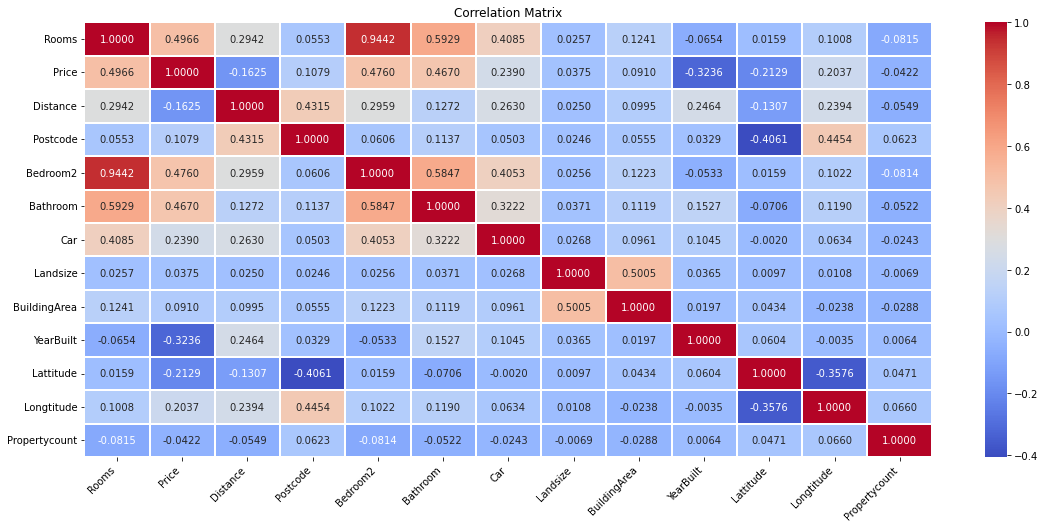

In [7]:
# 상관 행렬 계산
correlation_matrix = df.corr()

# 히트맵 시각화
plt.figure(figsize=(19, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.1)
plt.xticks(rotation=45, ha='right')  # x 축 레이블을 45도 기울여 표시
plt.yticks(rotation=0)  # y 축 레이블은 그대로 표시
plt.title('Correlation Matrix')
plt.show()

### 결측치 확인

In [8]:
# 컬럼별 결측치 개수 확인
missing_values = df.isnull().sum()

# 결측치 개수 출력
print("컬럼별 결측치 개수:")
print(missing_values)

컬럼별 결측치 개수:
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [ ]:
# df = df[df['YearBuilt'] != 1196] <--그 1196년도에 지어진 집 없애려다가 걍 둠

In [ ]:
# df['YearBuilt']

## 결측치 처리

### 수치형 데이터인 Car는 XGBregressor로 대체 활용

이 방법은 결측치를 다른 컬럼의 데이터를 활용해 예측한 후 그값을 대입하는 방법입니다.

In [9]:
from sklearn.linear_model import LinearRegression


# 결측치를 예측하는데 사용할 변수 선택 (모든 수치형 변수)
features = ['Rooms', 'Distance', 'Postcode', 'BuildingArea', 'YearBuilt','Lattitude','Longtitude','Bedroom2', 'Bathroom', 'Landsize', 'Propertycount']

# 결측치를 대체할 모델 훈련
car_data = df.dropna(subset=['Car'])  # 결측치가 없는 행만 선택하여 모델 훈련에 사용
X = car_data[features]
y = car_data['Car']
model = XGBRegressor()
model.fit(X, y)

# 결측치 예측
car_missing = df[df['Car'].isnull()]
X_missing = car_missing[features]
predicted_cars = model.predict(X_missing)

# 예측값으로 결측치 대체
df.loc[df['Car'].isnull(), 'Car'] = predicted_cars

In [10]:
building_area_features = ['Rooms', 'Distance', 'Postcode', 'BuildingArea', 'YearBuilt','Lattitude','Longtitude','Bedroom2', 'Bathroom', 'Landsize', 'Propertycount']

# 결측치를 대체할 모델 훈련
building_area_data = df.dropna(subset=['BuildingArea'])
X_building_area = building_area_data[building_area_features]
y_building_area = building_area_data['BuildingArea']
building_area_model = XGBRegressor()
building_area_model.fit(X_building_area, y_building_area)

# 결측치 예측
building_area_missing = df[df['BuildingArea'].isnull()]
X_building_area_missing = building_area_missing[building_area_features]
predicted_building_areas = building_area_model.predict(X_building_area_missing)

# 예측값으로 결측치 대체
df.loc[df['BuildingArea'].isnull(), 'BuildingArea'] = predicted_building_areas

In [11]:
year_built_features = ['Rooms', 'Distance', 'Postcode', 'BuildingArea', 'YearBuilt','Lattitude','Longtitude','Bedroom2', 'Bathroom', 'Landsize', 'Propertycount']
# 결측치를 대체할 모델 훈련
year_built_data = df.dropna(subset=['YearBuilt'])
X_year_built = year_built_data[year_built_features]
y_year_built = year_built_data['YearBuilt']
year_built_model = XGBRegressor()
year_built_model.fit(X_year_built, y_year_built)

# 결측치 예측
year_built_missing = df[df['YearBuilt'].isnull()]
X_year_built_missing = year_built_missing[year_built_features]
predicted_year_built = year_built_model.predict(X_year_built_missing)

# 예측값으로 결측치 대체
df.loc[df['YearBuilt'].isnull(), 'YearBuilt'] = predicted_year_built

Suburb가 CouncilArea의 하위 수준의 개념으로 판단하였기에 

'Suburb'가 같은 항목들의 'CouncilArea' 값을 사용하여 'CouncilArea' 열의 결측치를 처리

예를 들면 봉천동인데 구가 결측치인 애들은 다른 데이터를 참조하여 관악구로 대체하는 느낌

In [12]:
# 'Suburb'가 같은 항목들의 'CouncilArea' 값을 사용하여 'CouncilArea' 열의 결측치를 처리
df['CouncilArea'] = df.groupby('Suburb')['CouncilArea'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

그럼에도 결측치가 안없어지는 애들이 있었습니다.


애네는 애초에 다른 데이터에서 Suburb-CouncilArea쌍이 없는애들이었습니다.


7개밖에 없기도해서 그냥 행을 제거했습니다.

In [13]:
df[df['CouncilArea'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12251,Burnside,22 Paringa Wy,3,h,657500.0,SP,Harcourts,3/09/2017,14.8,3023.0,...,2.0,2.0,631.0,650.175659,2017.986084,NaN,-37.75225,144.75520,Western Metropolitan,1607.0
12438,Attwood,2 Herod Pl,3,h,640000.0,SP,YPA,9/09/2017,16.5,3049.0,...,2.0,2.0,607.0,651.154297,2017.986694,NaN,-37.67379,144.89826,Northern Metropolitan,1130.0
12865,Wallan,14 Danaher Av,3,h,366000.0,S,Ray,16/09/2017,44.2,3756.0,...,1.0,1.0,502.0,77.000000,1978.000000,NaN,-37.40853,144.97749,Northern Victoria,3988.0
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,...,3.0,5.0,44500.0,44515.000000,2017.962646,NaN,-37.45392,144.58864,Northern Victoria,849.0
13264,Plumpton,9 Remy Av,4,h,625500.0,SP,HAR,23/09/2017,23.8,3335.0,...,2.0,2.0,477.0,178.000000,2012.000000,NaN,-37.71429,144.72492,Western Metropolitan,1490.0
13381,Burnside,18 Fydler Av,3,h,580000.0,S,YPA,26/08/2017,14.8,3023.0,...,2.0,2.0,461.0,174.000000,2000.000000,NaN,-37.74518,144.74708,Western Metropolitan,1607.0
13494,Monbulk,21 David St,4,h,720000.0,SP,Fletchers,26/08/2017,34.1,3793.0,...,2.0,2.0,1611.0,788.271606,2017.986572,NaN,-37.87931,145.41288,Eastern Victoria,1424.0


In [14]:
df[df['Suburb'] == 'Burnside']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12251,Burnside,22 Paringa Wy,3,h,657500.0,SP,Harcourts,3/09/2017,14.8,3023.0,...,2.0,2.0,631.0,650.175659,2017.986084,NaN,-37.75225,144.75520,Western Metropolitan,1607.0
13381,Burnside,18 Fydler Av,3,h,580000.0,S,YPA,26/08/2017,14.8,3023.0,...,2.0,2.0,461.0,174.000000,2000.000000,NaN,-37.74518,144.74708,Western Metropolitan,1607.0


In [15]:
df[df['Suburb'] == 'Attwood']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12438,Attwood,2 Herod Pl,3,h,640000.0,SP,YPA,9/09/2017,16.5,3049.0,...,2.0,2.0,607.0,651.154297,2017.986694,NaN,-37.67379,144.89826,Northern Metropolitan,1130.0


In [16]:
df.dropna(subset=['CouncilArea'], inplace=True) #남은 7개 행제거

### 모든 결측치 제거 완료

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13573 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13573 non-null  object 
 1   Address        13573 non-null  object 
 2   Rooms          13573 non-null  int64  
 3   Type           13573 non-null  object 
 4   Price          13573 non-null  float64
 5   Method         13573 non-null  object 
 6   SellerG        13573 non-null  object 
 7   Date           13573 non-null  object 
 8   Distance       13573 non-null  float64
 9   Postcode       13573 non-null  float64
 10  Bedroom2       13573 non-null  float64
 11  Bathroom       13573 non-null  float64
 12  Car            13573 non-null  float64
 13  Landsize       13573 non-null  float64
 14  BuildingArea   13573 non-null  float64
 15  YearBuilt      13573 non-null  float64
 16  CouncilArea    13573 non-null  object 
 17  Lattitude      13573 non-null  float64
 18  Longti

# Object 변수 처리

In [19]:
categorical_columns = ['Suburb', 'Address','Type', 'Method', 'SellerG', 'Date','CouncilArea', 'Regionname']

# 각 범주형 변수의 고유한 값의 개수 확인
for col in categorical_columns:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} unique values")

Suburb: 308 unique values
Address: 13371 unique values
Type: 3 unique values
Method: 5 unique values
SellerG: 268 unique values
Date: 58 unique values
CouncilArea: 33 unique values
Regionname: 8 unique values


### 개인적인 처리방법

- Suburb : 제거
- Address : 제거
- CouncilArea : 제거 
- Regionname : 제거 (여기까지 지역 관련 정보는 좌표가 있기 때문에 일단 제거함)
- Type : One Hot Encoding
- Method : One Hot Encoding
- SellerG : 제거
- Date : 월 값만 실수형으로 대입

### date는 상의한대로 월 값만 대입

In [20]:
# 'Date' 열을 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# Month' 열 생성

df['Month'] = df['Date'].dt.month

# 'Date' 열 삭제
df.drop(columns=['Date'], inplace=True)

In [21]:
# 삭제할열들 삭제
df.drop(columns=['Suburb'], inplace=True)
df.drop(columns=['Address'], inplace=True)
df.drop(columns=['CouncilArea'], inplace=True)
df.drop(columns=['Regionname'], inplace=True)
df.drop(columns=['SellerG'], inplace=True)

In [22]:
# one-hot encoding

df = pd.get_dummies(df, columns=['Type', 'Method'])

### Object 변수 처리 완료

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13573 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13573 non-null  int64  
 1   Price          13573 non-null  float64
 2   Distance       13573 non-null  float64
 3   Postcode       13573 non-null  float64
 4   Bedroom2       13573 non-null  float64
 5   Bathroom       13573 non-null  float64
 6   Car            13573 non-null  float64
 7   Landsize       13573 non-null  float64
 8   BuildingArea   13573 non-null  float64
 9   YearBuilt      13573 non-null  float64
 10  Lattitude      13573 non-null  float64
 11  Longtitude     13573 non-null  float64
 12  Propertycount  13573 non-null  float64
 13  Month          13573 non-null  int64  
 14  Type_h         13573 non-null  uint8  
 15  Type_t         13573 non-null  uint8  
 16  Type_u         13573 non-null  uint8  
 17  Method_PI      13573 non-null  uint8  
 18  Method

## 이상치 제거 및 스케일링을 하기 전 종속 변수를 분리

In [24]:
training_features = [
    "Rooms", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", 
    "Landsize", "BuildingArea", "YearBuilt", "Lattitude", "Longtitude", 
    "Propertycount", "Month", "Type_h", "Type_t", "Type_u", 
    "Method_PI", "Method_S", "Method_SA", "Method_SP", "Method_VB"
]

### 예측해야하는 변수 'Price'를 제외하고 훈련시킬 데이터셋을 만들게여

In [25]:
data = df[training_features]

## 이상치 처리

### 원래 이상치 처리하려고 했으나 마땅한 기준을 잡기가 애매해서 그냥 안하는게 나을수도?


두 개정도 변수 보니까 이상치 몇백개씩 나옴. 사실 방이 엄청많은 집이나 거리가 엄청 먼 집이 있을수도 있으니 이상치로 보는게 무리일수도 있을거 같음

<AxesSubplot:>

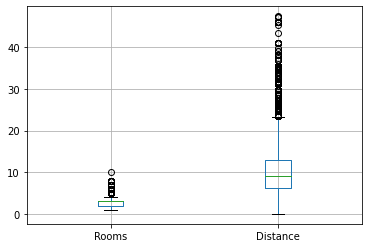

In [26]:
data.boxplot(column=["Rooms","Distance"])

In [27]:
# 이상치 개수 확인
outliers_rooms = data[data['Rooms'] > data['Rooms'].quantile(0.75) + 1.5 * (data['Rooms'].quantile(0.75) - data['Rooms'].quantile(0.25))].shape[0]
outliers_distance = data[data['Distance'] > data['Distance'].quantile(0.75) + 1.5 * (data['Distance'].quantile(0.75) - data['Distance'].quantile(0.25))].shape[0]

print("Rooms의 이상치 개수:", outliers_rooms)
print("Distance의 이상치 개수:", outliers_distance)

Rooms의 이상치 개수: 681
Distance의 이상치 개수: 407


## Standard 스케일링

In [28]:
# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler를 사용하여 데이터 정규화
data_scaled = scaler.fit_transform(data)

# 정규화된 데이터를 데이터프레임으로 변환
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

# 결과 확인
data_scaled_df.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,Propertycount,Month,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,-0.981127,-1.304393,-0.422986,-0.946692,-0.772038,-0.630484,-0.088862,0.216608,0.826516,0.122327,...,-0.785453,-1.341765,0.661448,-0.299021,-0.534611,-0.360882,0.710587,-0.08261,-0.378267,-0.311282
1,-0.981127,-1.304393,-0.422986,-0.946692,-0.772038,-1.669946,-0.100438,-0.541689,-2.200534,0.017430,...,-0.785453,-0.979262,0.661448,-0.299021,-0.534611,-0.360882,0.710587,-0.08261,-0.378267,-0.311282
2,0.065218,-1.304393,-0.422986,0.088636,0.673723,-1.669946,-0.105975,-0.477515,-2.200534,-0.000264,...,-0.785453,-0.979262,0.661448,-0.299021,-0.534611,-0.360882,-1.407287,-0.08261,2.643637,-0.311282
3,0.065218,-1.304393,-0.422986,0.088636,0.673723,-0.630484,-0.116041,0.205560,0.826575,0.156450,...,-0.785453,-0.979262,0.661448,-0.299021,-0.534611,2.770991,-1.407287,-0.08261,-0.378267,-0.311282
4,1.111563,-1.304393,-0.422986,0.088636,-0.772038,0.408978,-0.109498,-0.484746,0.724282,0.026277,...,-0.785453,-0.979262,0.661448,-0.299021,-0.534611,-0.360882,-1.407287,-0.08261,-0.378267,3.212517


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 특성과 타겟 데이터 선택

target = 'Price'

X = data
y = df[target]

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 154467235064.4176


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

target = 'Price'

X = data
y = df[target]

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 각 모델 정의
models = [
    ('LR', LinearRegression()),
    ('LASSO', Lasso()),
    ('EN', ElasticNet()),
    ('KNN', KNeighborsRegressor()),
    ('CART', DecisionTreeRegressor()),
    ('SVR', SVR()),
    ('ABR', AdaBoostRegressor()),
    ('GBR', GradientBoostingRegressor()),
    ('RFR', RandomForestRegressor()),
    ('ETR', ExtraTreesRegressor()),
    ('XGB', XGBRegressor()),
    ('CAT', CatBoostRegressor(silent=True))
]

# 각 모델별로 성능 평가
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results.append((name, r2))

# 결과 출력
for name, r2 in results:
    print("%s: %f" % (name, r2))

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.816e+13, tolerance: 4.506e+11
  model = cd_fast.enet_coordinate_descent(


LR: 0.597595
LASSO: 0.597597
EN: 0.511753
KNN: 0.567803
CART: 0.580662
SVR: -0.078920
ABR: -0.014517
GBR: 0.781371
RFR: 0.808691
ETR: 0.813430
XGB: 0.833851
CAT: 0.841028


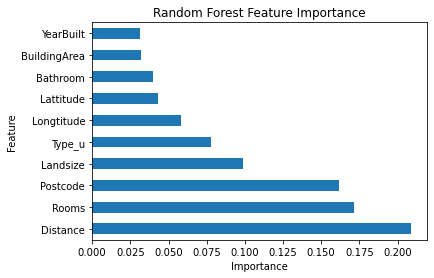

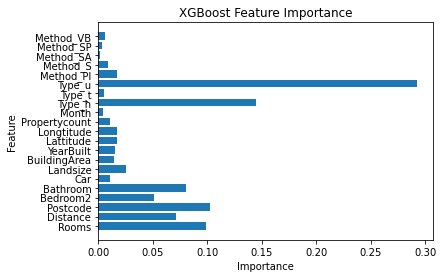

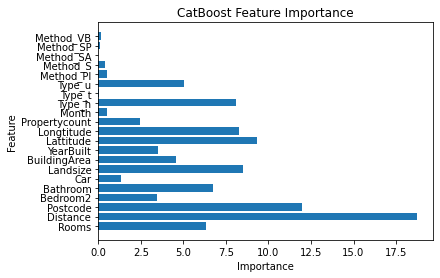

In [31]:
# 랜덤포레스트 모델에서 변수 중요도 시각화
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# XGBoost 모델에서 변수 중요도 시각화
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

importance = xgb_model.feature_importances_
plt.barh(X_train.columns, importance)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# CatBoost 모델에서 변수 중요도 시각화
cat_model = CatBoostRegressor(silent=True)
cat_model.fit(X_train, y_train)

importance = cat_model.get_feature_importance()
plt.barh(X_train.columns, importance)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

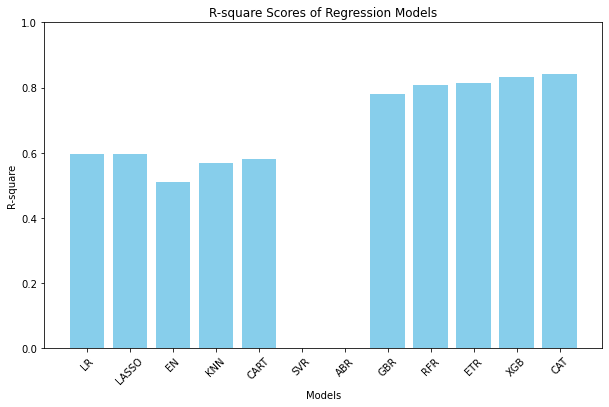

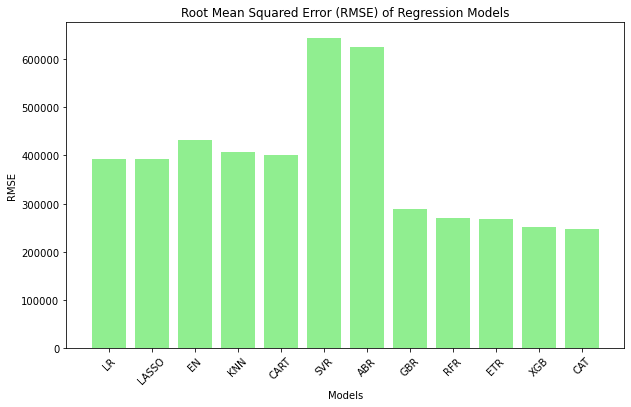

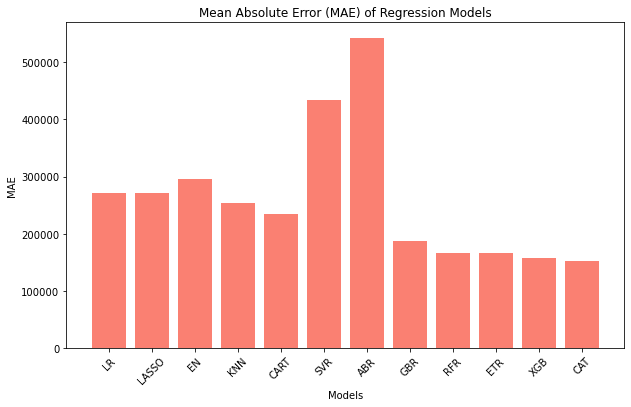

In [32]:
# 각 모델별 성능 지표 수집
r2_scores = [r2 for _, r2 in results]
models_names = [name for name, _ in models]

# RMSE 계산
rmse_scores = []
for name, model in models:
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# MAE 계산
mae_scores = []
for name, model in models:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

# R-square 시각화
plt.figure(figsize=(10, 6))
plt.bar(models_names, r2_scores, color='skyblue')
plt.title('R-square Scores of Regression Models')
plt.xlabel('Models')
plt.ylabel('R-square')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# RMSE 시각화
plt.figure(figsize=(10, 6))
plt.bar(models_names, rmse_scores, color='lightgreen')
plt.title('Root Mean Squared Error (RMSE) of Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

# MAE 시각화
plt.figure(figsize=(10, 6))
plt.bar(models_names, mae_scores, color='salmon')
plt.title('Mean Absolute Error (MAE) of Regression Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

In [33]:
# 결과를 데이터프레임으로 정리
performance_df = pd.DataFrame({
    'Model': models_names,
    'R-square': r2_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores
})

# 결과 출력
performance_df

,Model,R-square,RMSE,MAE
0,LR,0.597595,393023.199143,271573.643416
1,LASSO,0.597597,393022.544412,271572.265308
2,EN,0.511753,432918.638404,295636.904490
3,KNN,0.567803,407312.392843,253725.309834
4,CART,0.580662,401207.071257,234927.124494
5,SVR,-0.078920,643548.565614,433425.041860
6,ABR,-0.014517,624045.456739,541984.297173
7,GBR,0.781371,289694.903471,186879.575866
8,RFR,0.808691,270990.741625,166150.168206
9,ETR,0.813430,267613.007815,166998.648295


### CATboost가 모든 지표에서 가장 좋은 성적

#### 캐글 어떤 아저씨가 돌린게 R-squre : 0.820817	MAE : 159252.824508 이었는데 일단 그거보단 높게나옴(이아저씨도 그거 밸리데이션안함)


https://www.kaggle.com/code/vikasukani/melbourne-house-price-predic-using-ml-model